# Visa for Lisa

![aaa](http://s3.ap-south-1.amazonaws.com/img1.creditmantri.com/community/article/credit-cards-for-individuals-with-low-income.jpg)

**The purpose of this project is to: We have a file containing some information of bank customers. Using this information, we need to write a program that determines which client will accept the loan offered by the bank. This program helps the bank to increase its customers effectively.**


# Data Exploration

**Several libraries for exploring data and visualizing it**

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**Reading a file and getting information about it.**

In [13]:
def read_file(csv):
    return pd.read_csv(csv).drop('ID',axis=1)

df = read_file("Visa_For_Lisa_Loan_Modelling.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 5000 non-null   int64  
 1   Experience          5000 non-null   int64  
 2   Income              5000 non-null   int64  
 3   ZIP Code            5000 non-null   int64  
 4   Family              5000 non-null   int64  
 5   CCAvg               5000 non-null   float64
 6   Education           5000 non-null   int64  
 7   Mortgage            5000 non-null   int64  
 8   Personal Loan       5000 non-null   int64  
 9   Securities Account  5000 non-null   int64  
 10  CD Account          5000 non-null   int64  
 11  Online              5000 non-null   int64  
 12  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(12)
memory usage: 507.9 KB


**A brief overview of the data.**

In [14]:
df.head()

,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


**A brief explanation of what the columns in the data mean.**

**Age** --- The age of the client  
**Experience** --- Number of professional work experience  
**Income** --- Customer's annual income (S)  
**ZIP Code** --- Customer's postal code  
**Family** --- The size of the customer's family  
**CCAvg** --- Average Credit Card Spending per Month (S)  
**Education** --- Education Level (1) Undergraduate, (2) Graduate, (3) Advanced|Professional  
**Mortgage** --- Home mortgage value ($)  
**Personal Loan** --- Did the customer accept the personal loan offered? (1=Yes, 0=No)  
**Securities Account** --- Does the client have a securities account with the bank? (1=Yes, 0=No)  
**CD Account** --- Does the customer have a certificate of deposit with the bank? (1=Yes, 0=No)  
**Online** --- Does the customer use Internet banking services? (1=Yes, 0=No)  
**CreditCard** --- Does the customer use a credit card issued by Universal Bank? (1=Yes, 0=No)

In [15]:
df.isna().sum()

Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

**A table with several statistics about the data.**

In [16]:
df.describe()

,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


**Influence of values in columns on each other.**

In [17]:
corrr = df.corr(method='pearson')
corrr

,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
Age,1.000000,0.994215,-0.055269,-0.029216,-0.046418,-0.052012,0.041334,-0.012539,-0.007726,-0.000436,0.008043,0.013702,0.007681
Experience,0.994215,1.000000,-0.046574,-0.028626,-0.052563,-0.050077,0.013152,-0.010582,-0.007413,-0.001232,0.010353,0.013898,0.008967
Income,-0.055269,-0.046574,1.000000,-0.016410,-0.157501,0.645984,-0.187524,0.206806,0.502462,-0.002616,0.169738,0.014206,-0.002385
ZIP Code,-0.029216,-0.028626,-0.016410,1.000000,0.011778,-0.004061,-0.017377,0.007383,0.000107,0.004704,0.019972,0.016990,0.007691
Family,-0.046418,-0.052563,-0.157501,0.011778,1.000000,-0.109275,0.064929,-0.020445,0.061367,0.019994,0.014110,0.010354,0.011588
CCAvg,-0.052012,-0.050077,0.645984,-0.004061,-0.109275,1.000000,-0.136124,0.109905,0.366889,0.015086,0.136534,-0.003611,-0.006689
Education,0.041334,0.013152,-0.187524,-0.017377,0.064929,-0.136124,1.000000,-0.033327,0.136722,-0.010812,0.013934,-0.015004,-0.011014
Mortgage,-0.012539,-0.010582,0.206806,0.007383,-0.020445,0.109905,-0.033327,1.000000,0.142095,-0.005411,0.089311,-0.005995,-0.007231
Personal Loan,-0.007726,-0.007413,0.502462,0.000107,0.061367,0.366889,0.136722,0.142095,1.000000,0.021954,0.316355,0.006278,0.002802
Securities Account,-0.000436,-0.001232,-0.002616,0.004704,0.019994,0.015086,-0.010812,-0.005411,0.021954,1.000000,0.317034,0.012627,-0.015028


In [18]:
corrr['Personal Loan']

Age                  -0.007726
Experience           -0.007413
Income                0.502462
ZIP Code              0.000107
Family                0.061367
CCAvg                 0.366889
Education             0.136722
Mortgage              0.142095
Personal Loan         1.000000
Securities Account    0.021954
CD Account            0.316355
Online                0.006278
CreditCard            0.002802
Name: Personal Loan, dtype: float64

# Data vizualization

**A heatmap representation of the effect of the values in the columns on each other.**

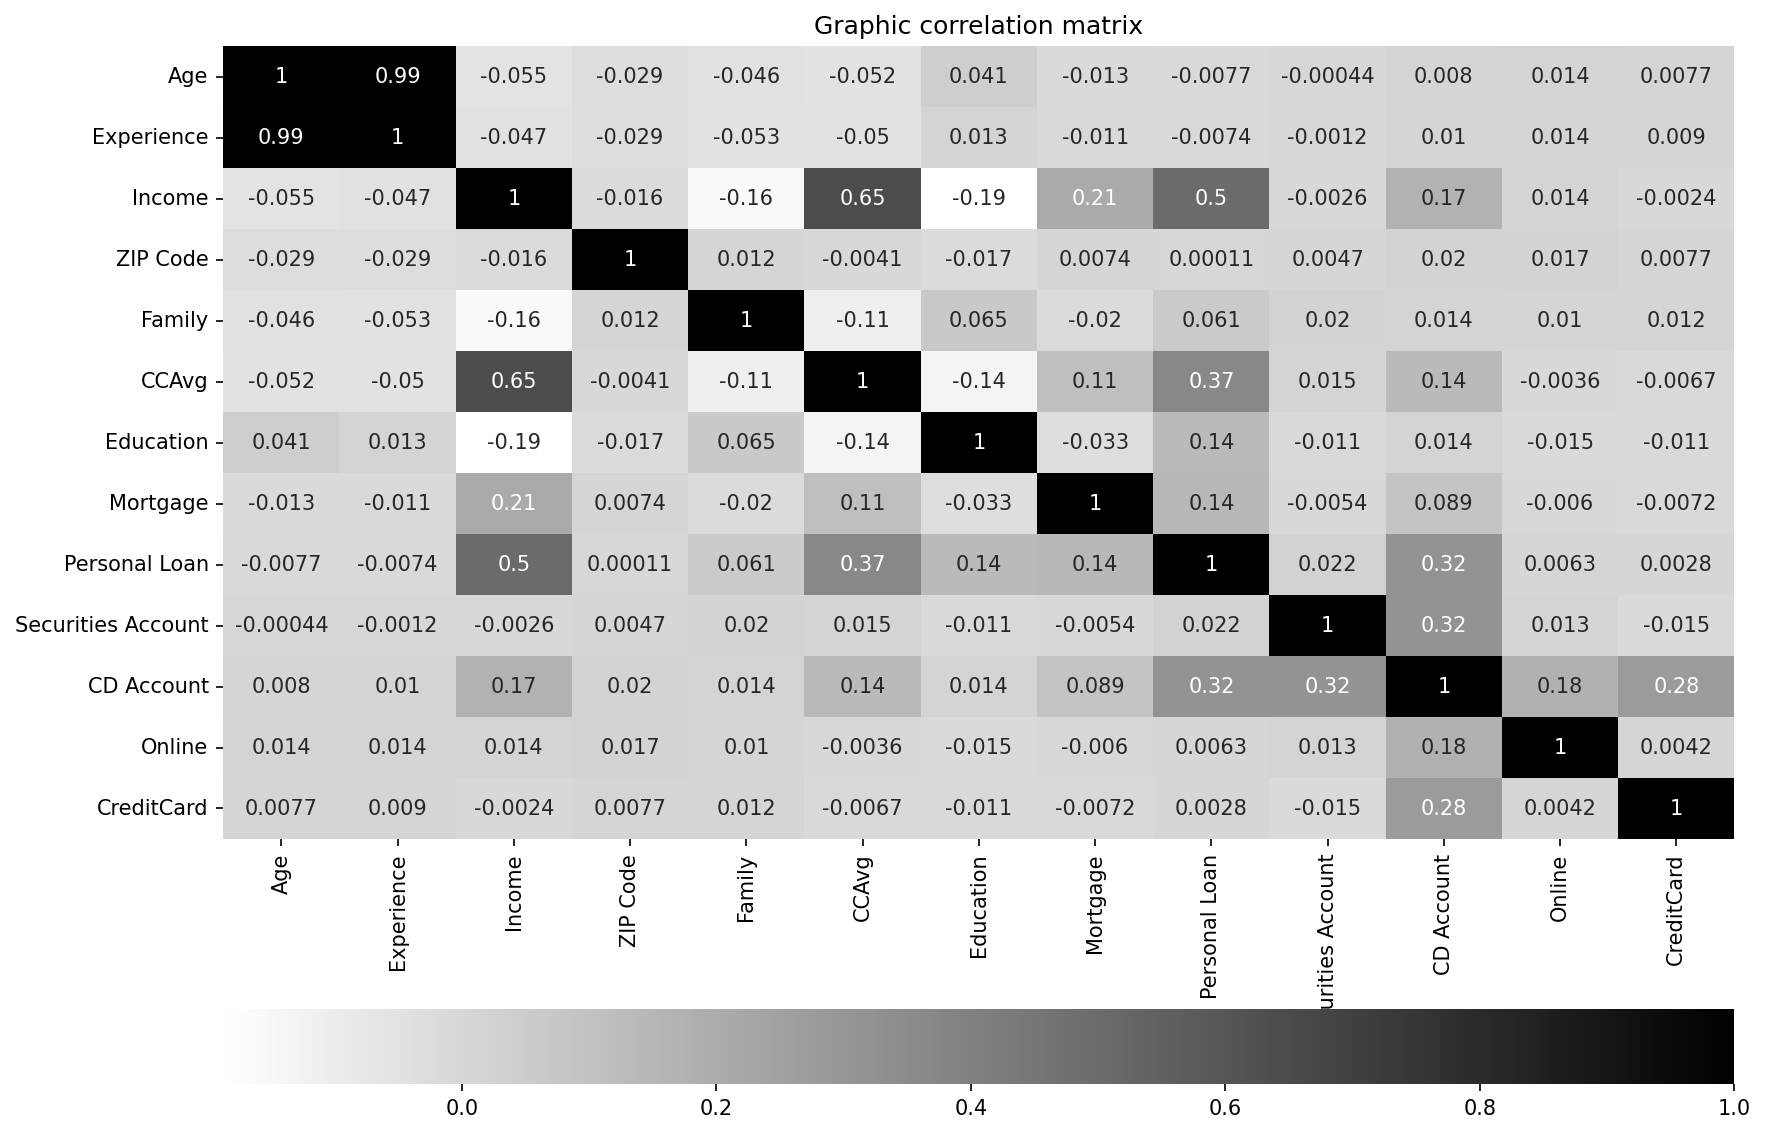

In [19]:
plt.figure(figsize=(13,10),dpi=150)
sns.heatmap(corrr, annot=True, cmap='gist_gray_r', cbar_kws={"orientation": "horizontal"})
plt.title('Graphic correlation matrix');

In [20]:
def f(a):
    if a>=40:
        return '- 40'
    else:
        return '+ 40'

dff = df.copy()
dff['Age'] = dff['Age'].apply(f)


**Values of the bank's customers younger than 40 years old and older who accepted the loan and those who did not are shown in the bar graph.**

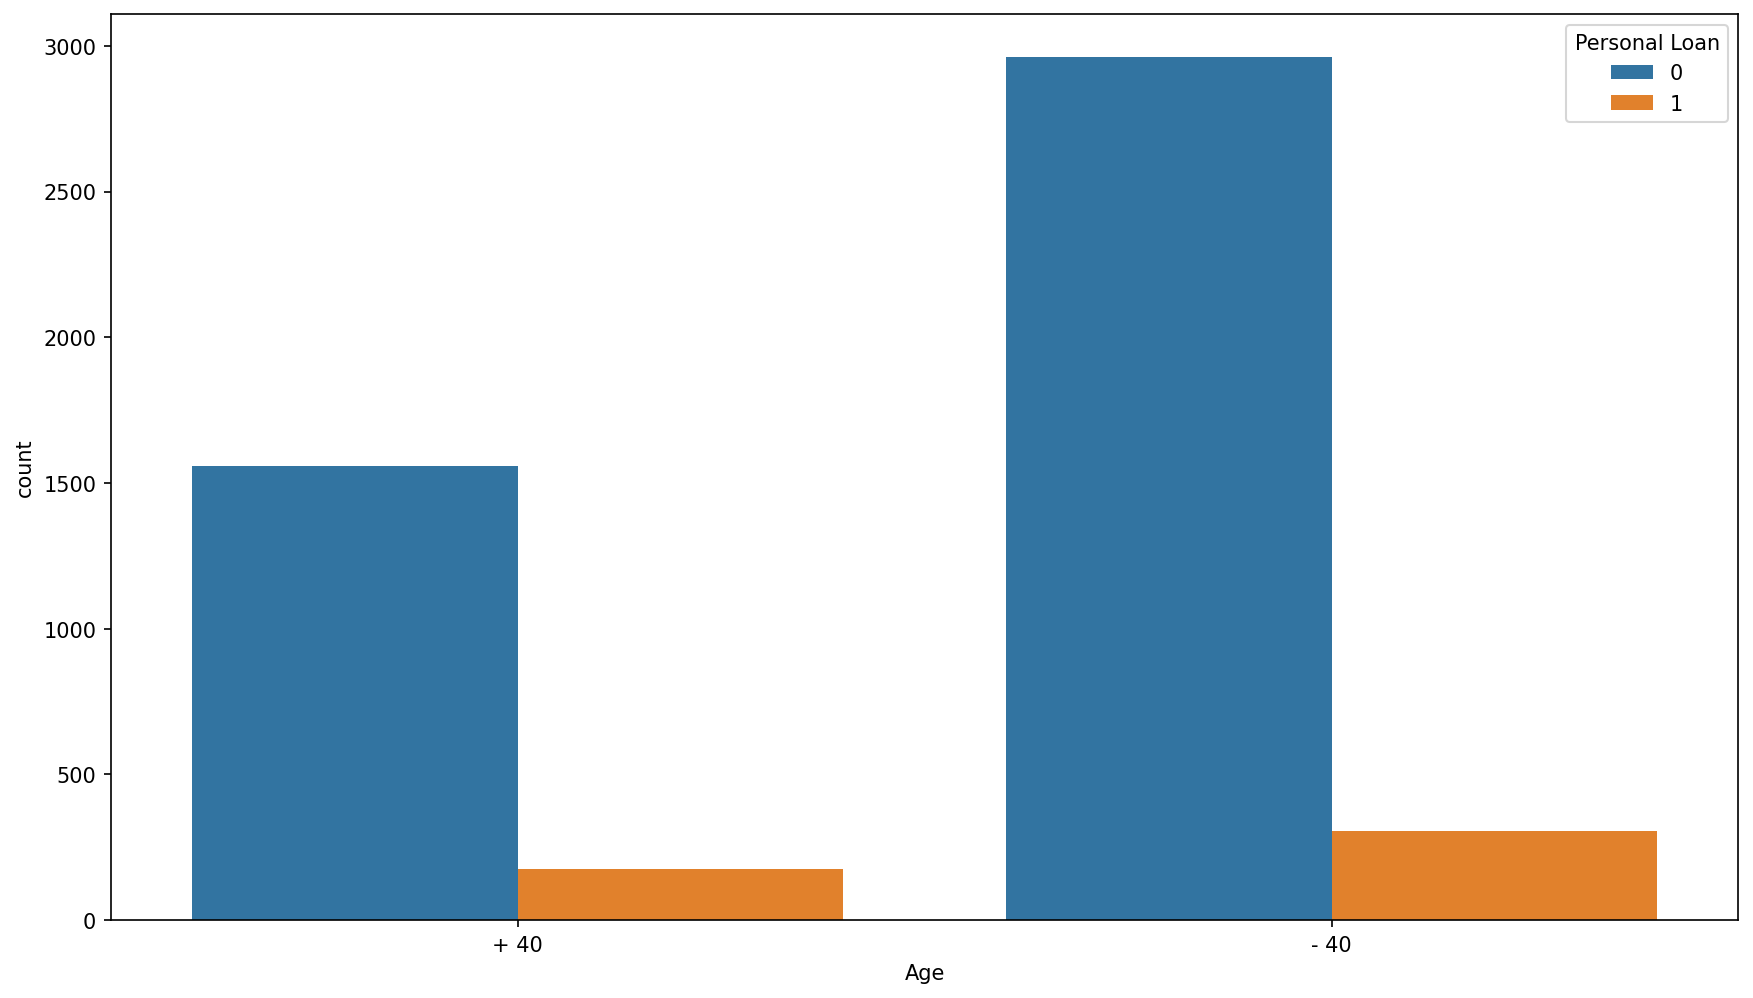

In [21]:
plt.figure(figsize=(14,8),dpi=150)
sns.countplot(data=dff, x='Age', hue='Personal Loan');

**Depending on the size of the family of the bank's customers, the value of those who accepted the loan and those who did not accept them is in the bar chart.**

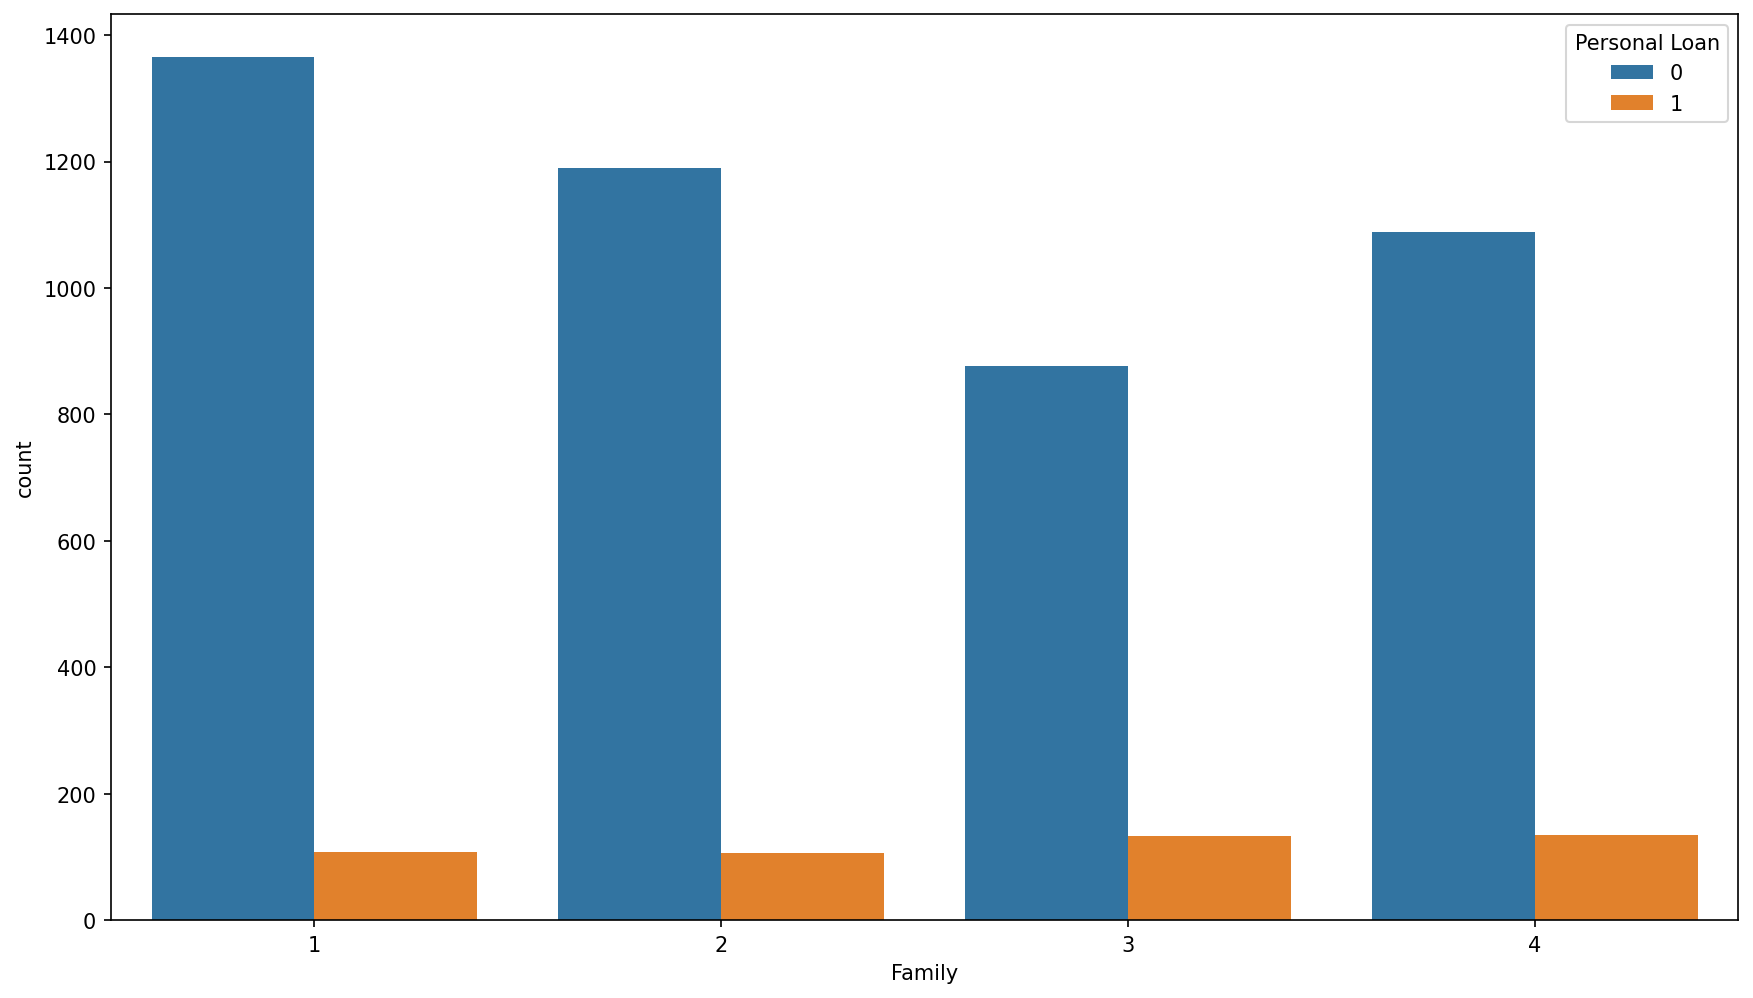

In [22]:
plt.figure(figsize=(14,8),dpi=150)
sns.countplot(data=dff, x='Family', hue='Personal Loan');

**The ratio of monthly credit expenses of bank customers to their annual income is shown in a scatter graph.**

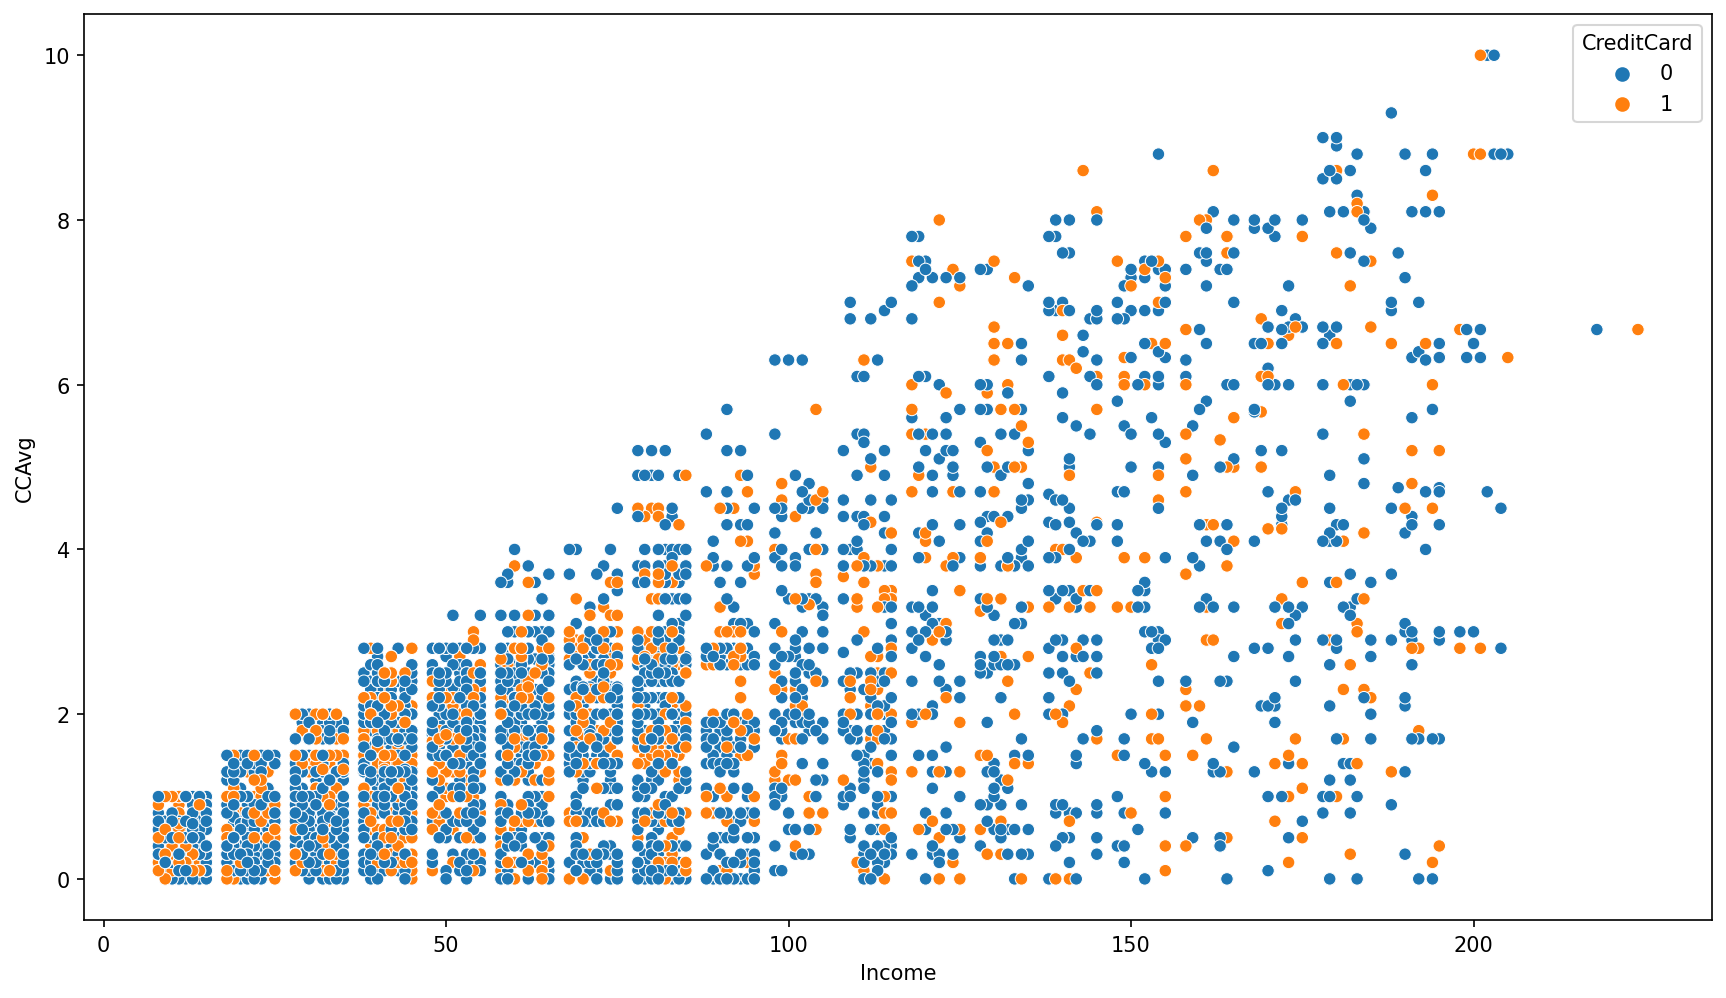

In [23]:
plt.figure(figsize=(14,8),dpi=150)
sns.scatterplot(data=dff, x='Income', y='CCAvg', hue='CreditCard');


**The ratio of the age of bank customers to their annual income and experience is shown in a scatter graph.**

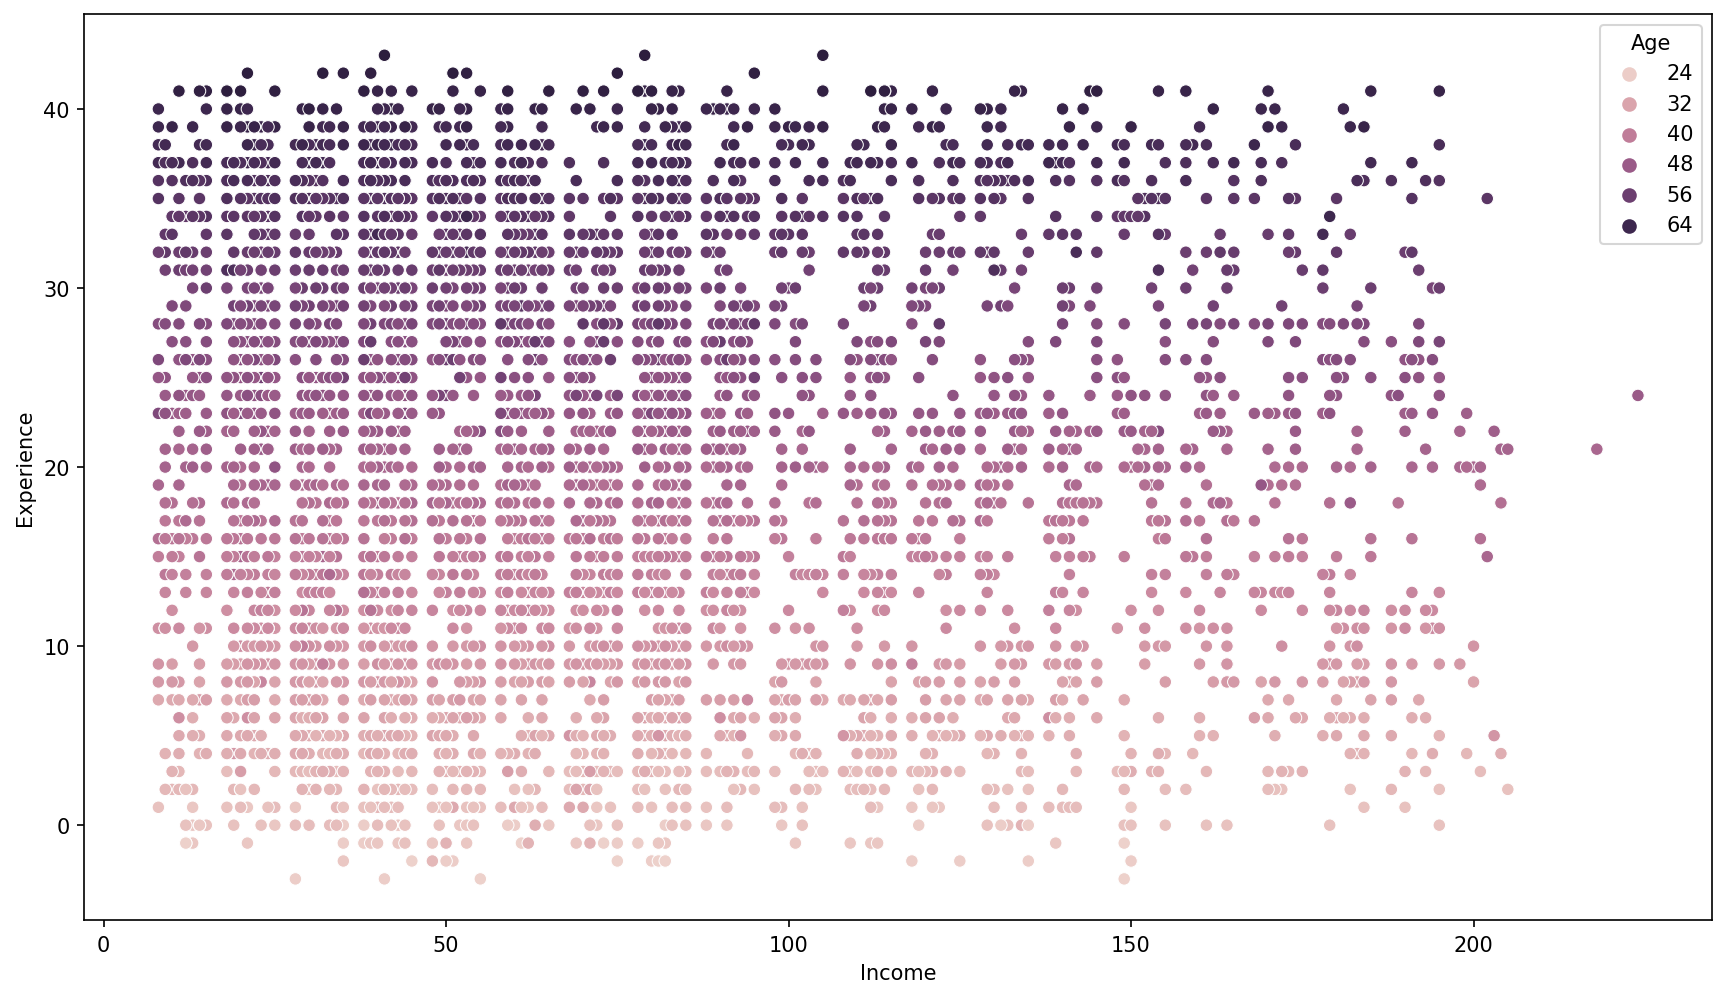

In [24]:
plt.figure(figsize=(14,8),dpi=150)
sns.scatterplot(data=df, x='Income', y='Experience', hue='Age');

**Values of monthly credit costs of bank customers younger than 40 years of age and older who received loans and those who did not receive them are in the boxplot.**

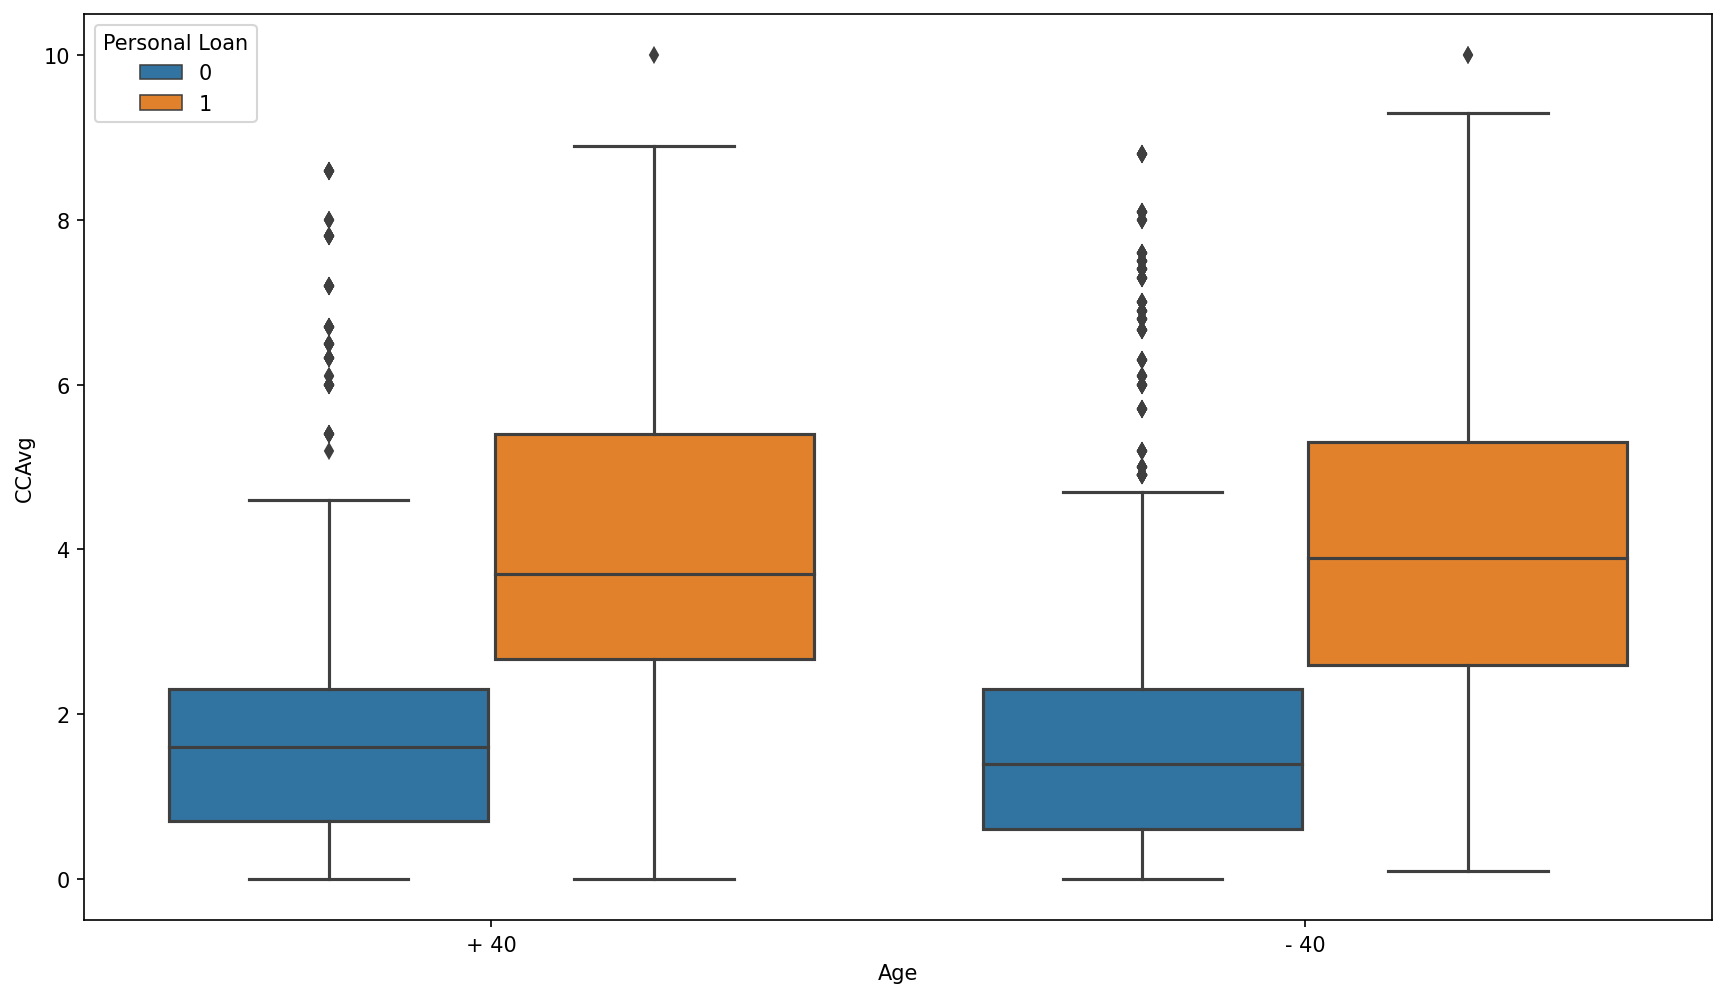

In [25]:
plt.figure(figsize=(14,8),dpi=150)
sns.boxplot(data=dff,y='CCAvg', x='Age',hue='Personal Loan');

**Values of monthly credit costs of bank customers who accepted loans and those who did not, depending on the level of education, are in the violinplot.**

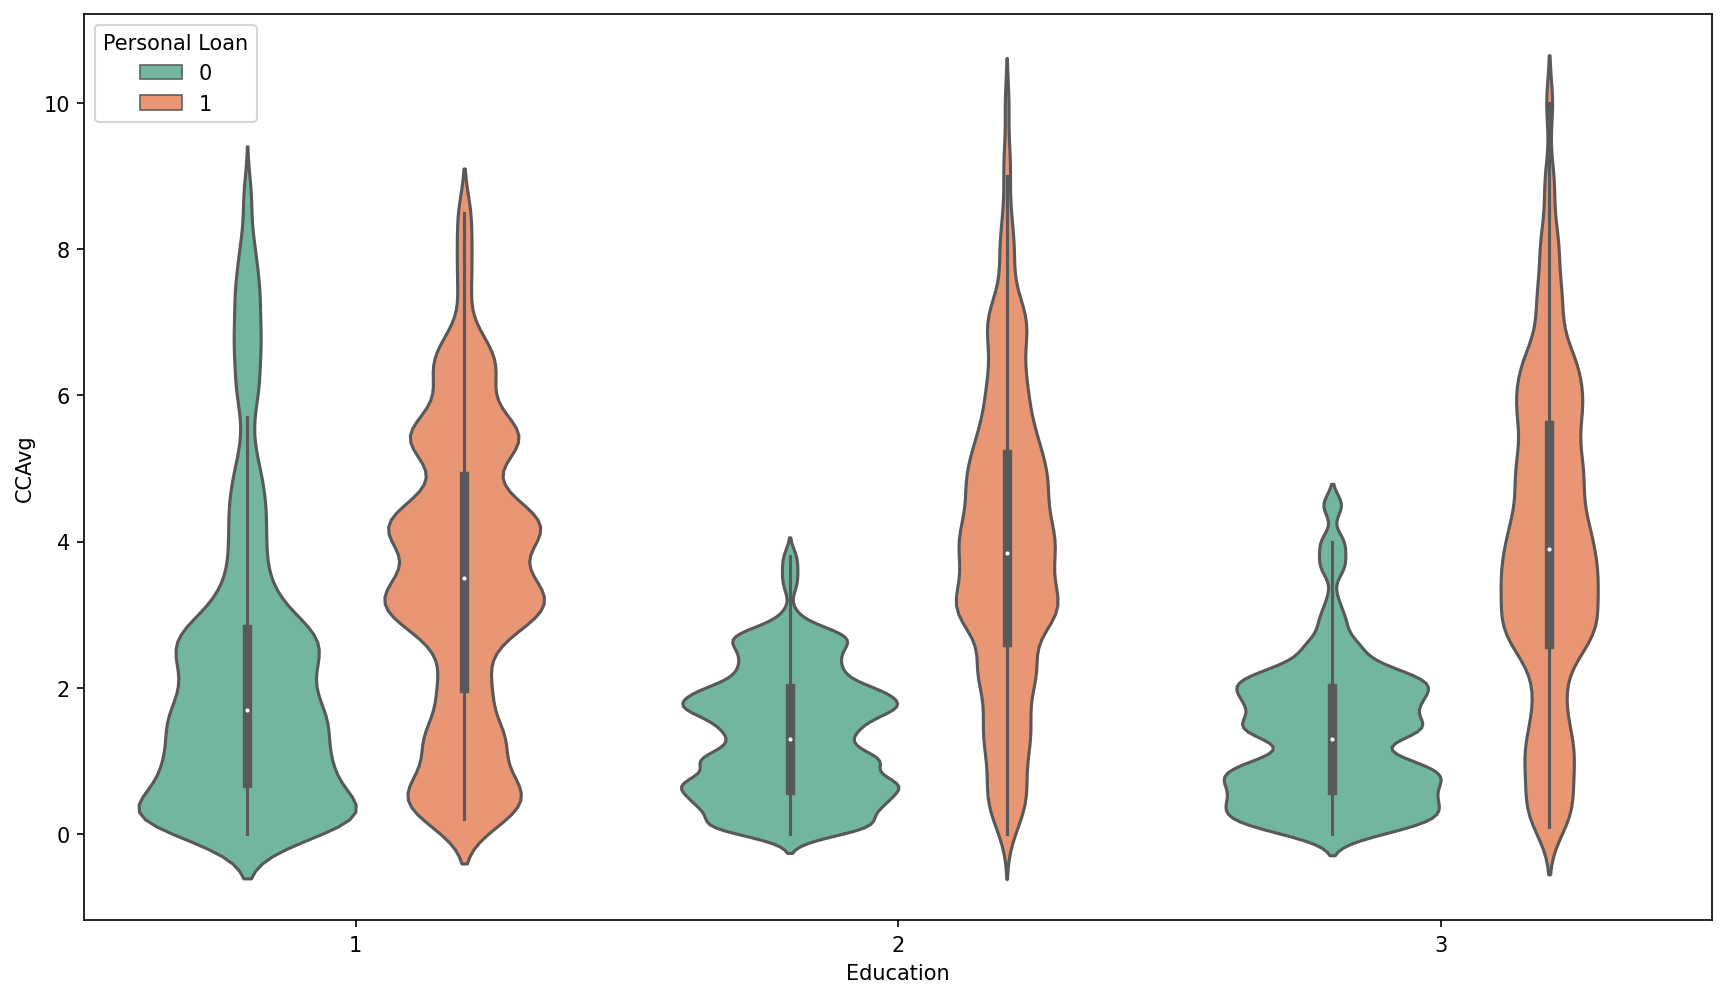

In [26]:
plt.figure(figsize=(14,8),dpi=150)
sns.violinplot(data=dff,y='CCAvg', x='Education',hue='Personal Loan', bw = 0.15, palette='Set2');

# Machine Learning

**Here are some machine learning libraries we will need.**

In [27]:
from sklearn.metrics import accuracy_score, mean_absolute_error, mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

**A function that partitions data to train and test machine learning models.**

In [28]:
def split_data(df):
    model_dataset = df[['Income', 'Family','CCAvg','Education', 'Mortgage', 
                        'Securities Account','CD Account', 'Personal Loan']]

    x = model_dataset.iloc[:, :-1]
    y = model_dataset.iloc[:, -1]
    x_train,x_test,y_train,y_test = train_test_split(x, y, test_size = 0.30, random_state=100)

    sc = StandardScaler()
    sc.fit(x_train)
    X_train_std = sc.transform(x_train)
    X_test_std = sc.transform(x_test)
    return X_train_std, X_test_std, y_train, y_test

X_train, X_test, y_train, y_test = split_data(df)

**Testing the data in the following multiple classification models.**

* RandomForestClassifier
* SVC
* DecisionTreeClassifier
* KNeighborsClassifier

Below are several error reports. Those closest to 0 are the models with the least error.


In [29]:
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)

y_pred_rfc = rfc.predict(X_test)

print(f'{rfc}\n')
print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred_rfc))
print('Mean Squared Error:', mean_squared_error(y_test, y_pred_rfc))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, y_pred_rfc)))
print('\nAccuracy score:', accuracy_score(y_test, y_pred_rfc))

RandomForestClassifier()

Mean Absolute Error: 0.016666666666666666
Mean Squared Error: 0.016666666666666666
Root Mean Squared Error: 0.12909944487358055

Accuracy score: 0.9833333333333333


In [30]:
svm = SVC(kernel='poly')
svm.fit(X_train, y_train)

y_pred_svm = svm.predict(X_test)

print(f'{svm}\n')
print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred_svm))
print('Mean Squared Error:', mean_squared_error(y_test, y_pred_svm))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, y_pred_svm)))
print('\nAccuracy score:', accuracy_score(y_test, y_pred_svm))

SVC(kernel='poly')

Mean Absolute Error: 0.03333333333333333
Mean Squared Error: 0.03333333333333333
Root Mean Squared Error: 0.18257418583505536

Accuracy score: 0.9666666666666667


In [31]:
tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)

y_pred_tree = tree.predict(X_test)

print(f'{tree}\n')
print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred_tree))
print('Mean Squared Error:', mean_squared_error(y_test, y_pred_tree))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, y_pred_tree)))
print('\nAccuracy score:', accuracy_score(y_test, y_pred_tree))

DecisionTreeClassifier()

Mean Absolute Error: 0.018
Mean Squared Error: 0.018
Root Mean Squared Error: 0.1341640786499874

Accuracy score: 0.982


In [32]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

y_pred_knn = knn.predict(X_test)

print(f'{knn}\n')
print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred_knn))
print('Mean Squared Error:', mean_squared_error(y_test, y_pred_knn))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, y_pred_knn)))
print('\nAccuracy score:', accuracy_score(y_test, y_pred_knn))

KNeighborsClassifier()

Mean Absolute Error: 0.034
Mean Squared Error: 0.034
Root Mean Squared Error: 0.18439088914585774

Accuracy score: 0.966


**Finally, the accuracy percentage of the models was determined.**

In [33]:
print(f'RandomForestClassifier accuracy score: {np.around(accuracy_score(y_test, y_pred_rfc)*100)} %')
print(f'\nSVC accuracy score: {np.around(accuracy_score(y_test, y_pred_svm)*100)} %')
print(f'\nDecisionTreeClassifier accuracy score: {np.around(accuracy_score(y_test, y_pred_tree)*100)} %')
print(f'\nKNeighborsClassifier accuracy score: {np.around(accuracy_score(y_test, y_pred_knn)*100)} %')

RandomForestClassifier accuracy score: 98.0 %

SVC accuracy score: 97.0 %

DecisionTreeClassifier accuracy score: 98.0 %

KNeighborsClassifier accuracy score: 97.0 %


# My conclusions from the data.

**From this information, I discovered the following..**
* It is not necessary to clean the data because it itself looks organized. 
* Our goal is **"Personal Loan"**. I found that the values that affect it are **"Income", "Family", "CCAvg", "Education", "Mortgage", "Securities Account" and "CD Account".**
* I have visualized the above values so that we can see the impact on "Personal Loan" more clearly.
* I compared them in order to choose a machine learning model.
* Among the models, the one with the best performance was the "RandomForestClassifier" model (**+98%**).
